#  ML model that will predict likelihood of getting H1B approved 

### Problem Statement
It is known that many US open job positions can not be filled due to the lack of qualified resources within the United States. One option that companies are using to solve this shortage is by sponsoring foreign qualified professionals via H1B visas.  Companies will submit applications on behalf of these foreign workers. 

The main outcome that companies and individuals are hoping for is Certified (approved). Besides it, the other potential outcomes are Rejected/Denied/Withdrawn/Pending.  


### Goal of the Project

The goal of my project is to answer the following question: Is it possible to predict if an H1B application will be Certified or not given the selected company sponsor/job title/duration?

### Data Source

The historical data that I will use to answer this question will cover at last fiscal year (Oct 1, 2017- Sept 30, 2018) of H1B visas applications and is available for collection at the Department of Labor. 

### Variables

The project will focus on Company sponsor (Employers), Job Title, process Duration. Note that to calculate the Duration, Decision Date and Case submitted date are used.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab
import copy

In [2]:
data_q4 = pd.read_excel("/Users/sheikita/Desktop/data/H-1B_copy.xlsx")

In [3]:
data_q4

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT
3,I-200-18070-575236,CERTIFIED,NaT,2018-03-30,H-1B,2018-09-10,2021-09-09,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,...,Y,N,Y,NaN,NaN,NEW CASTLE,NEW CASTLE,DE,19720,NaT
4,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT
5,I-200-18142-939501,CERTIFIED,2018-05-22,2018-05-29,H-1B,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,...,Y,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT
6,I-200-18121-552858,CERTIFIED,2018-05-01,2018-05-07,H-1B,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,...,Y,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT
7,I-200-18215-849606,CERTIFIED,2018-08-03,2018-08-09,H-1B,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,...,Y,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT
8,I-201-17339-472823,CERTIFIED,2017-12-08,2017-12-14,H-1B1 Chile,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,...,NaN,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT
9,I-200-18233-239931,CERTIFIED,2018-08-21,2018-08-27,H-1B,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,...,Y,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT


In [4]:
#What is the size of my data?
data_q4.shape


(654360, 52)

In [7]:
data_q4['WAGE_UNIT_OF_PAY'].value_counts()

Year         609230
Hour          44371
Month           497
Week            150
Bi-Weekly        99
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [5]:
#What are the variables in the data?
data_q4.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMP', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
      

In [6]:
#Given my goal: How many applications were approved/certified? 
data_q4['CASE_STATUS'].value_counts()

CERTIFIED              579449
CERTIFIED-WITHDRAWN     45004
WITHDRAWN               21280
DENIED                   8627
Name: CASE_STATUS, dtype: int64

A rough estimate shows that at least 80% of the submitted applications obtained the Certified status.

In [7]:
#What are the data type of the variables?
data_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 52 columns):
CASE_NUMBER                    654360 non-null object
CASE_STATUS                    654360 non-null object
CASE_SUBMITTED                 654359 non-null datetime64[ns]
DECISION_DATE                  654360 non-null datetime64[ns]
VISA_CLASS                     654360 non-null object
EMPLOYMENT_START_DATE          654353 non-null datetime64[ns]
EMPLOYMENT_END_DATE            654349 non-null datetime64[ns]
EMPLOYER_NAME                  654341 non-null object
EMPLOYER_BUSINESS_DBA          53490 non-null object
EMPLOYER_ADDRESS               654349 non-null object
EMPLOYER_CITY                  654349 non-null object
EMPLOYER_STATE                 654287 non-null object
EMPLOYER_POSTAL_CODE           654342 non-null object
EMPLOYER_COUNTRY               654353 non-null object
EMPLOYER_PROVINCE              6705 non-null object
EMPLOYER_PHONE                 654353 non-null obj

In [8]:
#Who are the employers submitting applications?
data_q4['EMPLOYER_NAME']

0                                     MICROSOFT CORPORATION
1                                    ERNST & YOUNG U.S. LLP
2                                              LOGIXHUB LLC
3                               HEXAWARE TECHNOLOGIES, INC.
4                                          ECLOUD LABS,INC.
5                                                 OBERON IT
6                                             ICONSOFT INC.
7                    COGNIZANT TECHNOLOGY SOLUTIONS US CORP
8                                          ISHI SYSTEMS INC
9                                         WB SOLUTIONS, LLC
10                                  INFOSTRETCH CORPORATION
11                                     THE ESAB GROUP, INC.
12                         LARSEN & TOUBRO INFOTECH LIMITED
13                        TATA CONSULTANCY SERVICES LIMITED
14                                 ACRO SERVICE CORPORATION
15                            TECH MAHINDRA (AMERICAS),INC.
16                                VERIZO

In [9]:
%matplotlib inline

## Data Wrangling

In [10]:
data_q4.loc[:, data_q4.isnull().any()]

,CASE_SUBMITTED,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,2018-01-29,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,REDMOND,WA,98052,UNITED STATES OF AMERICA,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT
1,2017-10-23,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,SECAUCUS,NJ,07094,UNITED STATES OF AMERICA,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT
2,2018-08-30,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,IRVING,TX,75062,UNITED STATES OF AMERICA,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT
3,NaT,2018-09-10,2021-09-09,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,NEW CASTLE,NEW CASTLE,DE,19720,NaT
4,2018-08-31,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT
5,2018-05-22,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,IRVING,TX,75038,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT
6,2018-05-01,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,BURLINGTON,MA,01803,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT
7,2018-08-03,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,COLLEGE STATION,TX,77845,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT
8,2017-12-08,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,JERSEY CITY,NJ,07311,UNITED STATES OF AMERICA,...,NaN,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT
9,2018-08-21,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,TAMPA,FL,33637,UNITED STATES OF AMERICA,...,Y,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT


In [11]:
data_q4['DURATION'] = data_q4['DECISION_DATE'] - data_q4['CASE_SUBMITTED']

In [12]:
data_q4.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE,DURATION
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT,4 days
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT,4 days
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT,7 days
3,I-200-18070-575236,CERTIFIED,NaT,2018-03-30,H-1B,2018-09-10,2021-09-09,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,...,N,Y,NaN,NaN,NEW CASTLE,NEW CASTLE,DE,19720,NaT,NaT
4,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT,7 days


In [13]:
type(data_q4.DURATION)

pandas.core.series.Series

In [14]:
# Summary of Statisics 
data_q4.describe()

,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMP,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PUBLIC_DISCLOSURE_LOCATION,DURATION
count,654354.000000,654360.000000,654360.000000,654360.000000,654360.000000,654360.000000,654360.000000,654360.000000,6.543570e+05,654293.000000,6.543600e+05,6.543570e+05,0.0,654359
mean,443245.480775,1.981541,0.847402,0.356701,0.144312,0.015667,0.301881,0.316630,8.204632e+04,2017.172493,9.119616e+04,2.565573e+04,NaN,31 days 19:08:14.585388
std,197179.559422,5.616134,4.037308,1.792549,1.163531,0.276556,1.503981,1.645804,1.236609e+06,3.576548,1.237008e+06,5.643532e+04,NaN,129 days 01:26:26.865513
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,NaN,0 days 00:00:00
25%,452112.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.462600e+04,2017.000000,7.000000e+04,0.000000e+00,NaN,6 days 00:00:00
50%,541511.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.012200e+04,2017.000000,8.560000e+04,0.000000e+00,NaN,6 days 00:00:00
75%,541511.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.709400e+04,2017.000000,1.080000e+05,0.000000e+00,NaN,6 days 00:00:00
max,928120.000000,200.000000,200.000000,99.000000,75.000000,50.000000,99.000000,109.000000,1.000000e+09,2107.000000,1.000000e+09,9.103328e+06,NaN,2794 days 00:00:00


In [15]:
# Top employers submitting applications

data_q4.EMPLOYER_NAME.value_counts(dropna=False)

DELOITTE CONSULTING LLP                                    16140
TATA CONSULTANCY SERVICES LIMITED                          14604
INFOSYS LIMITED                                            11591
COGNIZANT TECHNOLOGY SOLUTIONS US CORP                     11086
ERNST & YOUNG U.S. LLP                                      6892
ACCENTURE LLP                                               6381
WIPRO LIMITED                                               6306
GOOGLE LLC                                                  6099
CAPGEMINI AMERICA INC                                       6064
TECH MAHINDRA (AMERICAS),INC.                               5835
MICROSOFT CORPORATION                                       5552
IBM CORPORATION                                             5167
AMAZON.COM SERVICES, INC.                                   3894
SYNTEL INC                                                  3341
IBM INDIA PRIVATE LIMITED                                   3152
LARSEN & TOUBRO INFOTECH 

In [16]:
# Top job tittles       
data_q4.JOB_TITLE.value_counts(dropna=False)

SOFTWARE DEVELOPER                                     34907
SOFTWARE ENGINEER                                      31943
PROGRAMMER ANALYST                                     14109
SENIOR SOFTWARE ENGINEER                                8430
SENIOR SYSTEMS ANALYST JC60                             7041
DEVELOPER                                               6244
SYSTEMS ANALYST                                         6131
CONSULTANT                                              6004
ASSISTANT PROFESSOR                                     5302
BUSINESS ANALYST                                        5145
SENIOR CONSULTANT                                       4925
ANALYST                                                 4821
PROJECT MANAGER                                         3904
JAVA DEVELOPER                                          3578
SENIOR SOFTWARE DEVELOPER                               3516
ASSOCIATE                                               3501
COMPUTER SYSTEMS ANALYST

## Visa Type -Qts

In [17]:
data_q4.VISA_CLASS.value_counts(dropna=False)

H-1B               639519
E-3 Australian      12566
H-1B1 Singapore      1267
H-1B1 Chile          1008
Name: VISA_CLASS, dtype: int64

In [18]:
#Who are the employers for specific visa types like Chile?
data_q4.EMPLOYER_NAME[data_q4.VISA_CLASS =='H-1B1 Chile']

8                                         ISHI SYSTEMS INC
831                                     WELCOME AMIGOS INC
1189                               ECORIPE TROPICALS, INC.
1385                                        ICRACKED, INC.
1723         CASA DEL NINO BILINGUAL MONTESSORI SCHOOL LLC
2167             THE UNIVISION NETWORK LIMITED PARTNERSHIP
2274                                  CBV INSPECTIONS, LLC
2943                               DIECI UNITED STATES LLC
3195                            OCEANUS POWER & WATER, LLC
4044                                      GLOBALSHOPEX LLC
4747                                  JPMORGAN CHASE & CO.
5903                        NORTE&SUR QUALITY CONTROL INC.
6358                         LANDEROS HALL PRODUCTIONS LLC
6595                         DAVID ENSIGNIA TENNIS ACADEMY
6727                                      WHITE & CASE LLP
6766                                      WHITE & CASE LLP
6830                                       FISH BREWING 

In [19]:
data_q4.index  

RangeIndex(start=0, stop=654360, step=1)

In [20]:
# Extract the a sample of variables for futher study
hist_data= data_q4[['DECISION_DATE', 'VISA_CLASS',"EMPLOYER_NAME", 'JOB_TITLE']]

In [21]:
hist_data.head()

,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,JOB_TITLE
0,2018-02-02,H-1B,MICROSOFT CORPORATION,SOFTWARE ENGINEER
1,2017-10-27,H-1B,ERNST & YOUNG U.S. LLP,TAX SENIOR
2,2018-09-06,H-1B,LOGIXHUB LLC,DATABASE ADMINISTRATOR
3,2018-03-30,H-1B,"HEXAWARE TECHNOLOGIES, INC.",SOFTWARE ENGINEER
4,2018-09-07,H-1B,"ECLOUD LABS,INC.",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER


In [22]:
hist_data.columns

Index(['DECISION_DATE', 'VISA_CLASS', 'EMPLOYER_NAME', 'JOB_TITLE'], dtype='object')

In [23]:
# Select only decision date and visa class

hist_data.iloc[1:34, :2]

,DECISION_DATE,VISA_CLASS
1,2017-10-27,H-1B
2,2018-09-06,H-1B
3,2018-03-30,H-1B
4,2018-09-07,H-1B
5,2018-05-29,H-1B
6,2018-05-07,H-1B
7,2018-08-09,H-1B
8,2017-12-14,H-1B1 Chile
9,2018-08-27,H-1B
10,2018-03-06,H-1B


In [24]:
# Make a crosstab that contains the frequency of decision dates
newd= pd.crosstab(index=hist_data['DECISION_DATE'],  
                      columns="count")

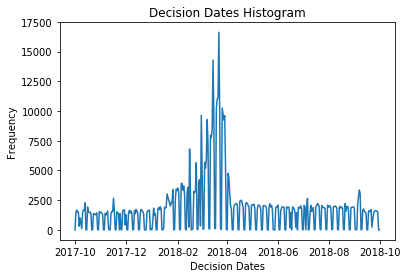

In [25]:
#Histogram of Decision Dates 
plt.plot(newd)
plt.xlabel('Decision Dates')
plt.ylabel ('Frequency')
plt.title('Decision Dates Histogram')
plt.show()

Looking into the histogram, it can be observed that there is a peak during February and April. This peak indicates that many of the applicants received an answer on their status.

In [27]:
# Copy into a different dataframe all the object data type variables
obj_Q4 = data_q4.select_dtypes(include=['object']).copy()

In [28]:
obj_Q4.head()

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,...,PW_SOURCE_OTHER,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,I-200-18026-338377,CERTIFIED,H-1B,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,REDMOND,WA,98052,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,N,N,NaN,NaN,REDMOND,KING,WA,98052
1,I-200-17296-353451,CERTIFIED,H-1B,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,SECAUCUS,NJ,07094,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,N,N,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110
2,I-200-18242-524477,CERTIFIED,H-1B,LOGIXHUB LLC,NaN,320 DECKER DRIVE,IRVING,TX,75062,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,N,N,NaN,NaN,IRVING,DALLAS,TX,75062
3,I-200-18070-575236,CERTIFIED,H-1B,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,NaN,NEW CASTLE,NEW CASTLE,DE,19720
4,I-200-18243-850522,CERTIFIED,H-1B,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,Y,BIRMINGHAM,SHELBY,AL,35244


In [29]:
#Find variables with null values
# Find obj_Q4[obj_Q4.isnull().any(axis=1)]

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,...,PW_SOURCE_OTHER,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,I-200-18026-338377,CERTIFIED,H-1B,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,REDMOND,WA,98052,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,N,N,NaN,NaN,REDMOND,KING,WA,98052
1,I-200-17296-353451,CERTIFIED,H-1B,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,SECAUCUS,NJ,07094,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,N,N,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110
2,I-200-18242-524477,CERTIFIED,H-1B,LOGIXHUB LLC,NaN,320 DECKER DRIVE,IRVING,TX,75062,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,N,N,NaN,NaN,IRVING,DALLAS,TX,75062
3,I-200-18070-575236,CERTIFIED,H-1B,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,NaN,NEW CASTLE,NEW CASTLE,DE,19720
4,I-200-18243-850522,CERTIFIED,H-1B,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,Y,BIRMINGHAM,SHELBY,AL,35244
5,I-200-18142-939501,CERTIFIED,H-1B,OBERON IT,NaN,1404 W WALNUT HILL LN,IRVING,TX,75038,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,NaN,SUNRISE,BROWARD,FL,33323
6,I-200-18121-552858,CERTIFIED,H-1B,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,BURLINGTON,MA,01803,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202
7,I-200-18215-849606,CERTIFIED,H-1B,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,COLLEGE STATION,TX,77845,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,NaN,OWINGS MILLS,BALTIMORE,MD,21117
8,I-201-17339-472823,CERTIFIED,H-1B1 Chile,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,JERSEY CITY,NJ,07311,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311
9,I-200-18233-239931,CERTIFIED,H-1B,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,TAMPA,FL,33637,UNITED STATES OF AMERICA,...,OFLC ONLINE DATA CENTER,Year,Y,N,Y,Y,ALPHARETTA,FULTON,GA,30005


In [30]:
#Find Employer name with missing values
data_q4.EMPLOYER_NAME.isna().sum()

19

In [32]:
# Find All variables that have missing values
print(obj_Q4.isnull().sum())

CASE_NUMBER                         0
CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                      19
EMPLOYER_BUSINESS_DBA          600870
EMPLOYER_ADDRESS                   11
EMPLOYER_CITY                      11
EMPLOYER_STATE                     73
EMPLOYER_POSTAL_CODE               18
EMPLOYER_COUNTRY                    7
EMPLOYER_PROVINCE              647655
EMPLOYER_PHONE                      7
EMPLOYER_PHONE_EXT             620308
AGENT_REPRESENTING_EMPLOYER        18
AGENT_ATTORNEY_NAME                 0
AGENT_ATTORNEY_CITY            195242
AGENT_ATTORNEY_STATE           220906
JOB_TITLE                           5
SOC_CODE                           11
SOC_NAME                           11
FULL_TIME_POSITION                  6
PW_UNIT_OF_PAY                     57
PW_WAGE_LEVEL                   38218
PW_SOURCE                          55
PW_SOURCE_OTHER                  6658
WAGE_UNIT_OF_PAY                   13
H1B_DEPENDEN

In [33]:
# For WillFul violator variable, find out the distribution of observations
data_q4.WILLFUL_VIOLATOR.value_counts()

N    639875
Y       324
Name: WILLFUL_VIOLATOR, dtype: int64

In [34]:
# For further analysis of object data type variables 
ft_df = obj_Q4[['FULL_TIME_POSITION', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR']]
ft_df.head()

,FULL_TIME_POSITION,H1B_DEPENDENT,WILLFUL_VIOLATOR
0,Y,N,N
1,Y,N,N
2,Y,N,N
3,Y,Y,N
4,Y,Y,N


In [35]:
# For H1B dependent variable, find out the distribution of observations
ft_df.H1B_DEPENDENT.value_counts()

N    412491
Y    227713
Name: H1B_DEPENDENT, dtype: int64

In [36]:
# For FUll time position variable, find out the distribution of observations
ft_df.FULL_TIME_POSITION.value_counts()

Y    641341
N     13013
Name: FULL_TIME_POSITION, dtype: int64

In [37]:
# Fill out the missing observations for the variables with the most frequent one
ft_df = ft_df.fillna({"FULL_TIME_POSITION": "Y"})
ft_df = ft_df.fillna({"H1B_DEPENDENT": "N"})
ft_df = ft_df.fillna({"WILLFUL_VIOLATOR": "N"})

In [49]:
# Variables don't have any missing values
ft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 3 columns):
FULL_TIME_POSITION    654360 non-null object
H1B_DEPENDENT         654360 non-null object
WILLFUL_VIOLATOR      654360 non-null object
dtypes: object(3)
memory usage: 15.0+ MB


In [38]:
# Convert them from object to category data type
ft_df["FULL_TIME_POSITION"] = ft_df["FULL_TIME_POSITION"].astype('category')
ft_df["H1B_DEPENDENT"] = ft_df["H1B_DEPENDENT"].astype('category')
ft_df['WILLFUL_VIOLATOR'] = ft_df['WILLFUL_VIOLATOR'].astype('category')

ft_df.dtypes

FULL_TIME_POSITION    category
H1B_DEPENDENT         category
WILLFUL_VIOLATOR      category
dtype: object

In [39]:
ft_df.shape

(654360, 3)

In [40]:
#Full_time position variable new distribution
ft_df['FULL_TIME_POSITION'].value_counts()

Y    641347
N     13013
Name: FULL_TIME_POSITION, dtype: int64

In [41]:
da = {'FULL_TIME_YES': 641347, 'FULL_TIME_NO': 13013 }
nam_f = list(da.keys())
val_f = list(da.values())

Text(0.5,0.98,'Categorical Plotting')

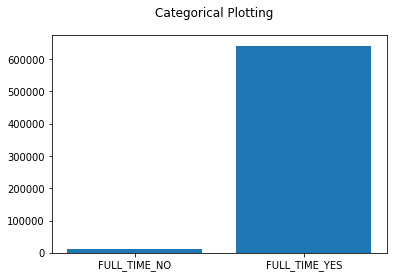

In [42]:
fig, ax = plt.subplots()
ax.bar(nam_f, val_f)
fig.suptitle('Categorical Plotting')

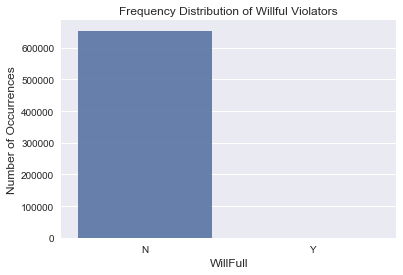

In [43]:
#Using Seaborn for plotting
Will_counts =ft_df['WILLFUL_VIOLATOR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Will_counts.index, Will_counts.values, alpha=0.9)
plt.title('Frequency Distribution of Willful Violators')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('WillFull', fontsize=12)
plt.show()

In [44]:
obj_Q4.EMPLOYER_NAME.value_counts().count()

70564

In [45]:
#For further analysis, the below variables were grouped into a new dataframe
evisa_df= obj_Q4[["CASE_STATUS", "VISA_CLASS", "EMPLOYER_NAME"]]

In [46]:
evisa_df[evisa_df.isnull().any(axis=1)]

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME
2678,DENIED,H-1B,NaN
10741,DENIED,H-1B,NaN
35102,DENIED,H-1B,NaN
44338,DENIED,H-1B,NaN
52654,DENIED,H-1B,NaN
71241,CERTIFIED,H-1B,NaN
85753,CERTIFIED,H-1B,NaN
128981,WITHDRAWN,H-1B,NaN
136292,WITHDRAWN,H-1B,NaN
188349,CERTIFIED,H-1B,NaN


In [47]:
#Find Employer name with missing values
evisa_df.EMPLOYER_NAME.isna().sum()

19

In [48]:
#Fill the values for Employer Name
evisa_df = evisa_df.fillna({"EMPLOYER_NAME": "OTHER"})


In [49]:
#Change the data type to category for the variables
evisa_df["EMPLOYER_NAME"] = evisa_df["EMPLOYER_NAME"].astype('category')
evisa_df["CASE_STATUS"] = evisa_df["CASE_STATUS"].astype('category')
evisa_df["VISA_CLASS"] = evisa_df["VISA_CLASS"].astype('category')

In [50]:
evisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 3 columns):
CASE_STATUS      654360 non-null category
VISA_CLASS       654360 non-null category
EMPLOYER_NAME    654360 non-null category
dtypes: category(3)
memory usage: 6.8 MB


In [51]:
#Assign categorical codes to the appropriate variables
evisa_df["VISA_cat"] = evisa_df["VISA_CLASS"].cat.codes
evisa_df.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,VISA_cat
0,CERTIFIED,H-1B,MICROSOFT CORPORATION,1
1,CERTIFIED,H-1B,ERNST & YOUNG U.S. LLP,1
2,CERTIFIED,H-1B,LOGIXHUB LLC,1
3,CERTIFIED,H-1B,"HEXAWARE TECHNOLOGIES, INC.",1
4,CERTIFIED,H-1B,"ECLOUD LABS,INC.",1


In [53]:
em_c = evisa_df["EMPLOYER_NAME"].value_counts()
topemp = em_c.head(10)
print(topemp)

DELOITTE CONSULTING LLP                   16140
TATA CONSULTANCY SERVICES LIMITED         14604
INFOSYS LIMITED                           11591
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    11086
ERNST & YOUNG U.S. LLP                     6892
ACCENTURE LLP                              6381
WIPRO LIMITED                              6306
GOOGLE LLC                                 6099
CAPGEMINI AMERICA INC                      6064
TECH MAHINDRA (AMERICAS),INC.              5835
Name: EMPLOYER_NAME, dtype: int64


In [54]:
top_e = {'DELOITTE CONSULTING LLP ': 16140, 'TATA CONSULTANCY SL': 14604, 'INFOSYS LIMITED':11591,  'COGNIZANT SOLUTIONS US CORP': 11086, 
        'E&Y': 6892, 'Accenture': 6381, 'WIPRO L': 6306, 'GOOGLE': 6099, 'GAPGEMINI AMERICA': 6064, 'TECH MAHINDRA (AMERICAS)': 5835}
nam_e = list(top_e.keys())
val_e = list(top_e.values())

Text(0.5,0.98,'Top Employers')

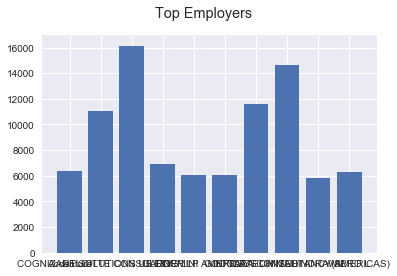

In [55]:
fig, ax = plt.subplots()
ax.bar(nam_e, val_e)
fig.suptitle('Top Employers')